<h2>Exercise session 3.2: Ensemble methods

Exercises from the book <i>Advances in Financial Machine Learning</i> by Marcos Lopez de Prado, Chapter 6.

An ensemble method is a method that combines a set of weak learners, all based on the same learning algorithm, in order to create a (stronger) learner that performs better than any of the individual ones. Ensemble methods help reduce bias and/or variance.

In [ ]:
#pip install scikit-learn

In [1]:
# importing basic packages for data processing and ML tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

<div style="text-align: justify">The following snippets generate synthetic datasets for classification using 2 features across 10000 samples with/without additional noisy. You can generate more complex datasets by modifying the <i>make_classification</i> function parameters.

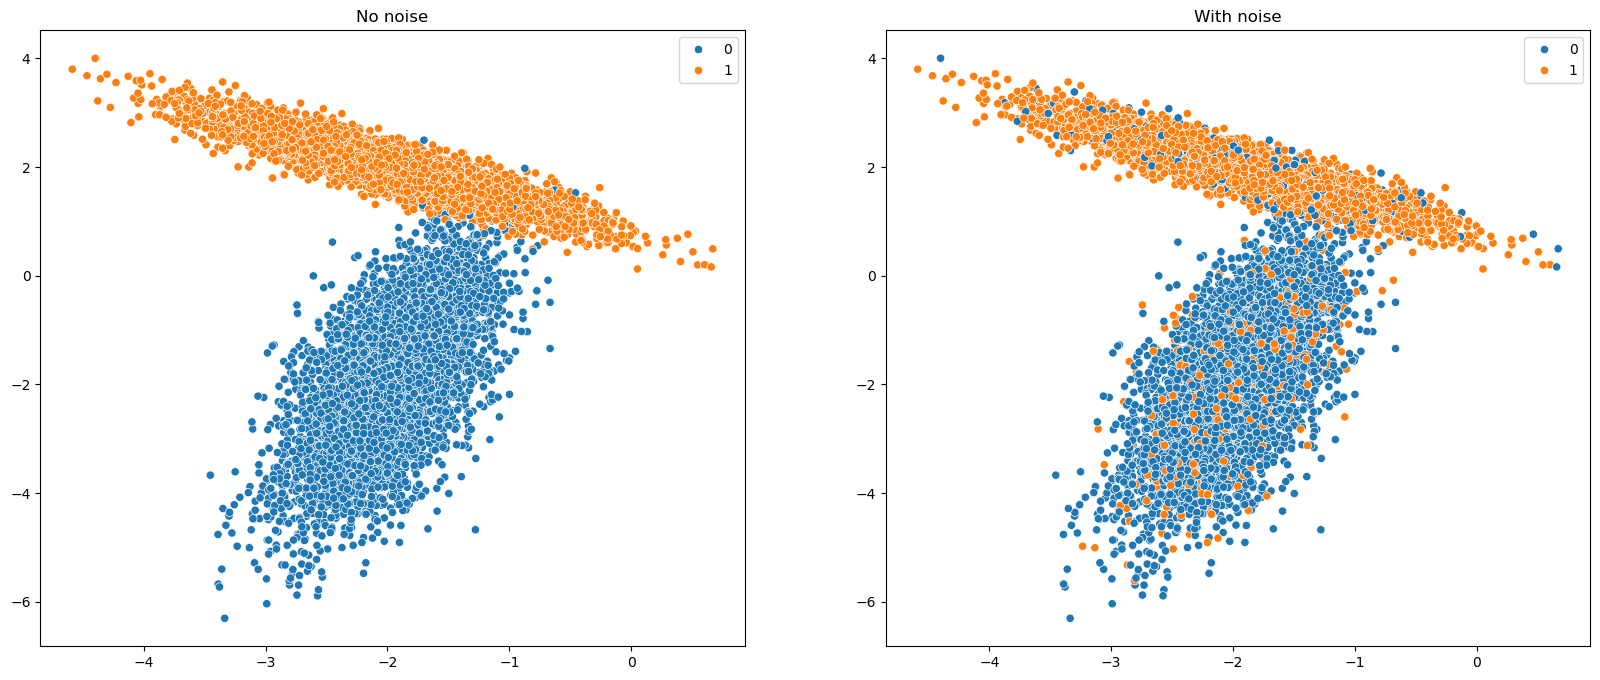

In [2]:
# Generate Clean data
X_not_noisy, y_not_noisy = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, class_sep=2, flip_y=0, weights=[0.5,0.5], random_state=17)
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.scatterplot(x=X_not_noisy[:,0], y=X_not_noisy[:,1], hue=y_not_noisy, ax=ax1)
ax1.set_title("No noise")

# Generate noisy Data
X_noisy, y_noisy = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, class_sep=2, flip_y=0.2, weights=[0.5,0.5], random_state=17)
sns.scatterplot(x=X_noisy[:,0], y=X_noisy[:,1], hue=y_noisy, ax=ax2)
ax2.set_title("With noise")
plt.show()



Splitting dataset to train and test subsets in 2:1 ratio:

In [3]:
X_noisy_train, X_noisy_test, y_noisy_train, y_noisy_test = train_test_split(X_noisy, y_noisy, test_size=0.33, random_state=42)
X_not_noisy_train, X_not_noisy_test, y_not_noisy_train, y_not_noisy_test = train_test_split(X_not_noisy, y_not_noisy, test_size=0.33, random_state=42)

### Exercise 3.2.1

#### Build an ensemble of estimators, where the base estimator is a decision tree.

#### (a) How is this ensemble different from an RF?

#### (b) Using sklearn, produce a bagging classifier that behaves like an RF. What parameters did you have to set up, and how?

In [4]:
single_Dtree_noisy = DecisionTreeClassifier().fit(X_noisy_train, y_noisy_train)
single_Dtree_not_noisy = DecisionTreeClassifier().fit(X_not_noisy_train, y_not_noisy_train)

bagging_DTree_noisy = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0).fit(X_noisy_train, y_noisy_train)
bagging_DTree_not_noisy = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0).fit(X_not_noisy_train, y_not_noisy_train)

single_RForest_noisy = RandomForestClassifier().fit(X_noisy_train, y_noisy_train)
single_RForest_not_noisy = RandomForestClassifier().fit(X_not_noisy_train, y_not_noisy_train)

The following reports show the improvements using bootstrap aggregating compared to a single decision tree and random forest performance:

In [5]:
# single decision tree
print(classification_report(y_noisy_test, single_Dtree_noisy.predict(X_noisy_test)))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1645
           1       0.81      0.81      0.81      1655

    accuracy                           0.81      3300
   macro avg       0.81      0.81      0.81      3300
weighted avg       0.81      0.81      0.81      3300



In [6]:
# bagging decision trees
print(classification_report(y_noisy_test, bagging_DTree_noisy.predict(X_noisy_test)))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1645
           1       0.88      0.86      0.87      1655

    accuracy                           0.87      3300
   macro avg       0.87      0.87      0.87      3300
weighted avg       0.87      0.87      0.87      3300



In [7]:
# single random forest
print(classification_report(y_noisy_test, single_RForest_noisy.predict(X_noisy_test)))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1645
           1       0.88      0.88      0.88      1655

    accuracy                           0.88      3300
   macro avg       0.88      0.88      0.88      3300
weighted avg       0.88      0.88      0.88      3300



### Exercise 3.2.2

#### Consider the relation between an RF, the number of trees it is composed of, and the number of features utilized.

#### (a) Could you envision a relation between the minimum number of trees needed in an RF and the number of features utilized?

#### (b) Could the number of trees be too small for the number of features used?

#### (c) Could the number of trees be too high for the number of observations available?